### Normalização

In [709]:
# Inteligência Artificial
# Alunos: Helon e Tiago

import pandas as pd # para manipulação e análise de dados
import numpy as np # computação científica - utilizada nas curvas gaussinas
import matplotlib.pyplot as plt # para os gráficos/visualizações

#from sklearn.cluster import KMeans

# Biblioteca para fazer a normalização
from sklearn.preprocessing import MinMaxScaler

In [710]:
# DataFrame (df_) é uma estrutura de dados rotulada bidimensional em pandas ("tabela de dados")

# Carregando o arquivo
df_original = pd.read_csv("D:\\Users\\tiago\\OneDrive\\SI UFRRJ\\5p\\Inteligencia Artificial\\Trabalhos\\Trabalho 5 - Redes Neurais Art e Tratamento de Dados\\Fase 1\\Dados inicial\\dados.csv", sep = ";") # "\t" Tabulação que separa

df_original # Imprime parte da tabela
# Essa coluna que é impressa sózinha, mais a esquerda, enumerando, começa com zero mais simboliza a segunda coluna do ".csv", atenção nisso.

 #df_original.head(7) # Linha 9 vira (9-2) = 7. (POIS NÃO CONTA A PRIMEIRA LINHA E COMEÇA EM 0) 7 é onde está um Nan, na coluna V9 (fins de testes)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473,9029.0,53952.0,45770,"43731,1",2512,113.0,29403,80609.0,63724.0,"71,19",158,158,158,1
1,98373,56367.0,-1.0,22473,"68861,1",563,139.0,114136,129245.0,33859.0,"87,57",190,155,119,1
2,787,93203.0,109460.0,105912,"550,9",3258,127.0,11412,300882.0,326.0,"80,01",145,120,72,1
3,4590,76386.0,23087.0,46211,3213,2276,140.0,80428,71589.0,533.0,"88,2",154,137,109,1
4,84631,30822.0,25158.0,12022,"59241,7",2167,143.0,43401,22692.0,88707.0,"90,09",193,193,193,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739,10052.0,13710.0,19704,"517,3",6041,118.0,1669,47897.0,680.0,"74,34",88,121,61,0
158,2418,5151.0,8552.0,19830,"1692,6",14374,108.0,1921,37343.0,11061.0,"68,04",77,87,91,0
159,5736,7147.0,16064.0,13879,"4015,2",7682,120.0,3391,NaN,3703.0,"75,6",105,128,66,0
160,5600,13967.0,13290.0,13161,3920,4307,130.0,81,50146.0,98.0,"81,9",121,144,56,0


In [711]:
# Atribuindo nomes às colunas do DataFrame (as células e seus dados não são afetados/acessados)
df_original.columns = ['V1','V2', 'V3',	'V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

# Visualizando as primeiras linhas do DataFrame
df_original.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473,9029.0,53952.0,45770,"43731,1",2512,113.0,29403,80609.0,63724.0,"71,19",158,158,158,1
1,98373,56367.0,-1.0,22473,"68861,1",563,139.0,114136,129245.0,33859.0,"87,57",190,155,119,1
2,787,93203.0,109460.0,105912,"550,9",3258,127.0,11412,300882.0,326.0,"80,01",145,120,72,1
3,4590,76386.0,23087.0,46211,3213,2276,140.0,80428,71589.0,533.0,"88,2",154,137,109,1
4,84631,30822.0,25158.0,12022,"59241,7",2167,143.0,43401,22692.0,88707.0,"90,09",193,193,193,1


In [712]:
# Substituindo as "vírgulas" por "pontos" - pois o valor decimal aqui, é separado por "pontos" (e não por "vírgulas" como nas planilhas)
df_original = df_original.astype(str) # converter todas as colunas para o tipo string
df_original = df_original.apply(lambda x: x.str.replace(',', '.')) # substituindo


df_original = df_original.astype(float) # converter para float

# Imprime parte da tabela
df_original

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,-1.0,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.0,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.0,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.0,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.0,19704.0,517.3,6041.0,118.0,1669.0,47897.0,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.0,19830.0,1692.6,14374.0,108.0,1921.0,37343.0,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.0,13879.0,4015.2,7682.0,120.0,3391.0,NaN,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.0,13161.0,3920.0,4307.0,130.0,81.0,50146.0,98.0,81.90,121.0,144.0,56.0,0.0


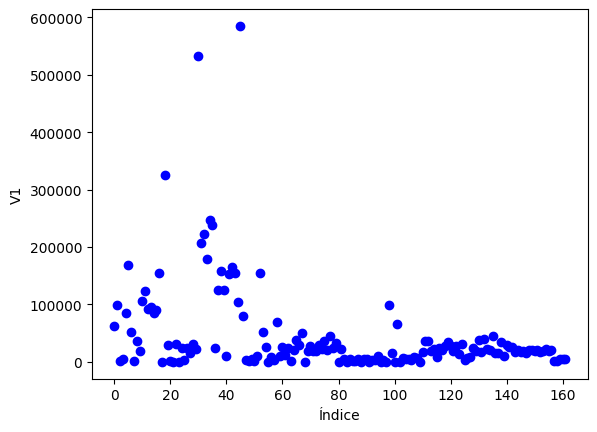

{'V1': [533485.0, 585013.0], 'Indice': [30, 45]}


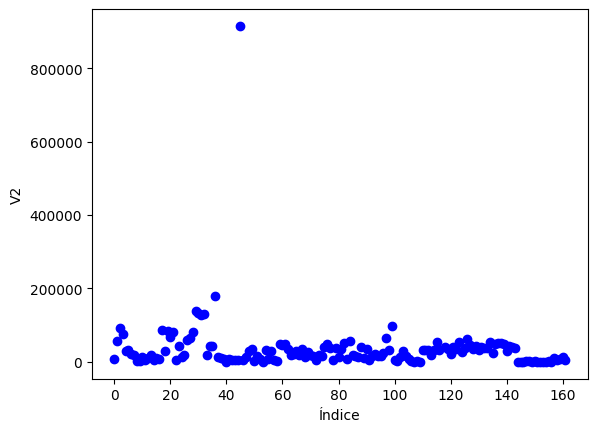

{'V2': [915161.0], 'Indice': [45]}


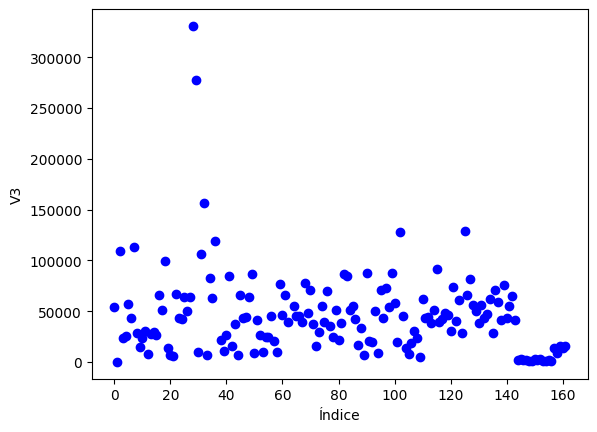

{'V3': [330723.0, 277198.0], 'Indice': [28, 29]}


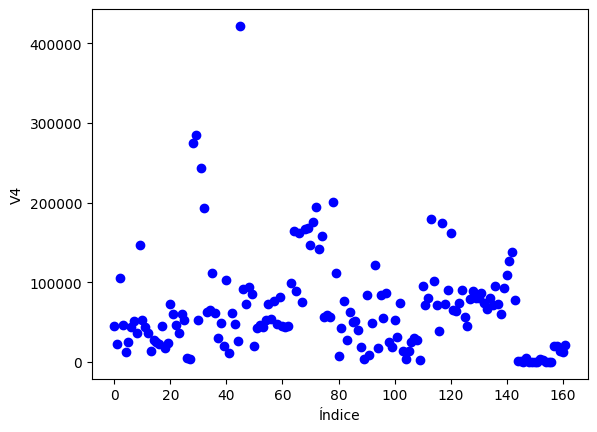

{'V4': [421789.0], 'Indice': [45]}


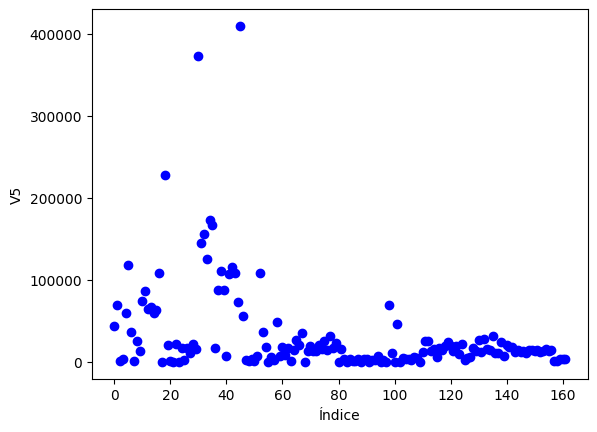

{'V5': [373439.5, 409509.1], 'Indice': [30, 45]}


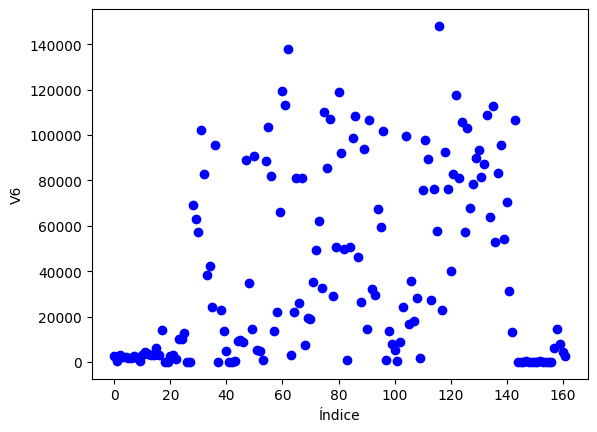

{'V6': [], 'Indice': []}


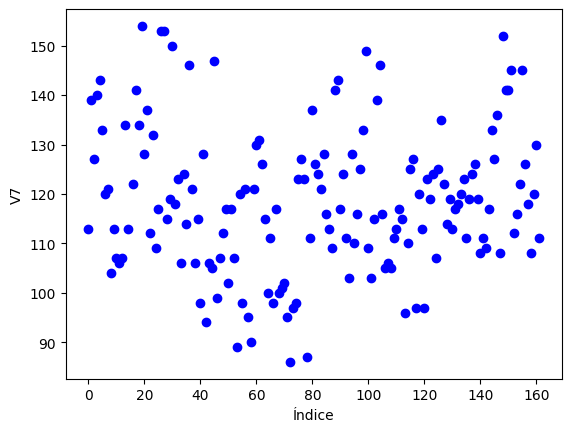

{'V7': [], 'Indice': []}


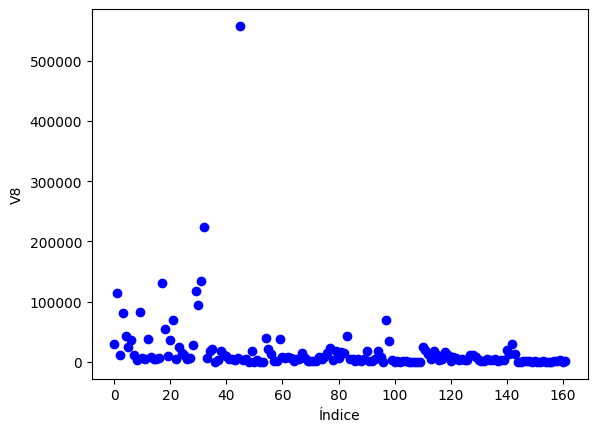

{'V8': [557763.0], 'Indice': [45]}


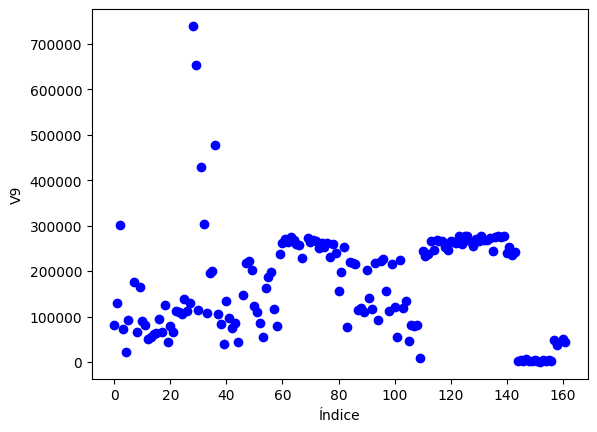

{'V9': [], 'Indice': []}


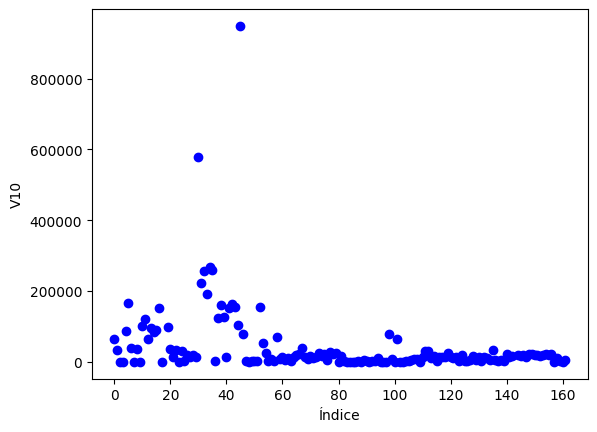

{'V10': [577485.0, 948705.0], 'Indice': [30, 45]}


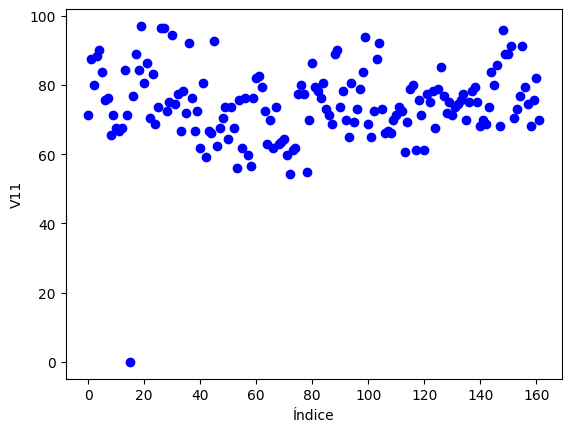

{'V11': [0.0], 'Indice': [15]}


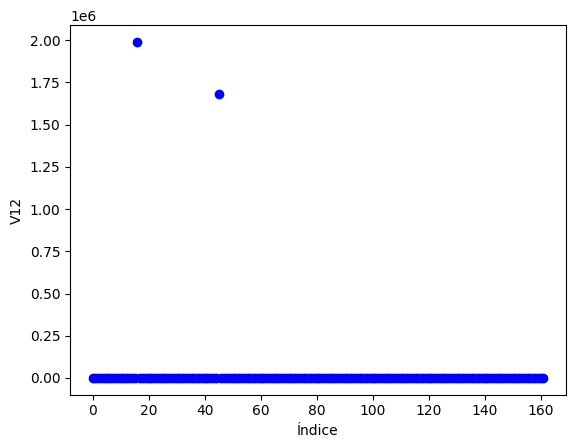

{'V12': [1990000.0, 1680000.0], 'Indice': [16, 45]}


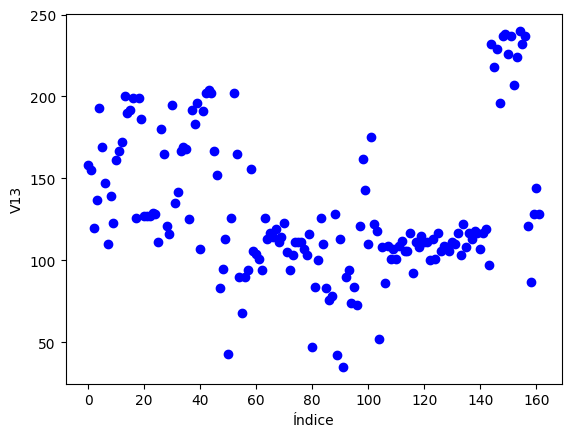

{'V13': [], 'Indice': []}


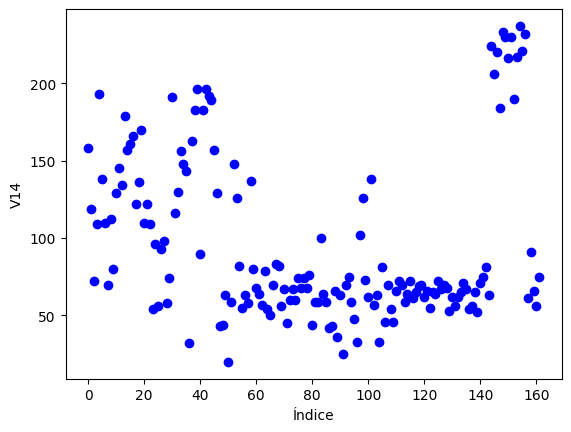

{'V14': [], 'Indice': []}


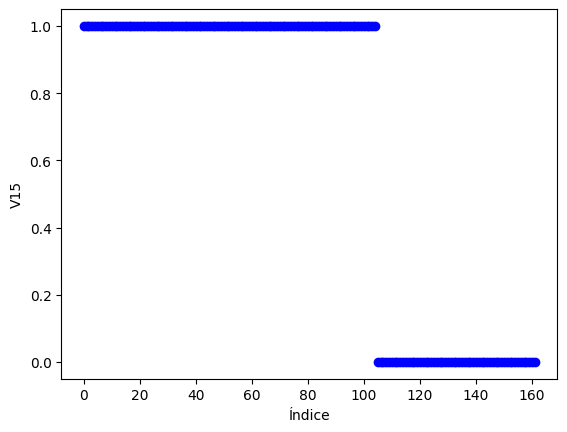

{'V15': [], 'Indice': []}


In [713]:
# Definir limite para considerar um valor como outlier
limite = 5  # Número de desvios padrão a partir da média

# Criar um dicionário vazio para armazenar os outliers
outliers = {}
outliers_dict = {}

# Percorrer todas as colunas do DataFrame
for coluna in df_original.columns:
    # Plotar gráfico de dispersão da coluna
    plt.scatter(range(len(df_original[coluna])), df_original[coluna], color='blue')
    plt.xlabel('Índice')
    plt.ylabel(coluna)
    plt.show()

    # Definir coluna alvo
    coluna_alvo = coluna

    # Calcular média e desvio padrão da coluna
    media = df_original[coluna_alvo].mean()
    desvio_padrao = df_original[coluna_alvo].std()

    # Definir limite para considerar um valor como outlier
    limite = 5  # Número de desvios padrão a partir da média

    # Identificar outliers
    outliers = df_original.loc[abs(df_original[coluna_alvo] - media) > limite * desvio_padrao]
    outliers_dict = {coluna_alvo: outliers[coluna_alvo].to_list(), 'Indice': outliers.index.to_list()}

    # Exibir os outliers como um dicionário
    print(outliers_dict)


In [714]:
# Definir limite para considerar um valor como outlier
limite = 5  # Número de desvios padrão a partir da média

# Criar um dicionário vazio para armazenar os outliers
outliers = {}

# Percorrer todas as colunas do DataFrame
for coluna in df_original.columns:
    # Calcular média e desvio padrão da coluna
    media = df_original[coluna].mean()
    desvio_padrao = df_original[coluna].std()

    # Identificar outliers
    outliers_coluna = df_original.loc[abs(df_original[coluna] - media) > limite * desvio_padrao]

    # Verificar se há outliers para a coluna atual
    if not outliers_coluna.empty:
        # Armazenar os valores outliers e seus índices no dicionário
        outliers[coluna] = {
            'Valores': outliers_coluna[coluna].to_list(),
            'Indice': outliers_coluna.index.to_list()
        }

        # Substituir os outliers pelos quartis mais próximos daquela coluna
        quartis = df_original[coluna].quantile([0.25, 0.5, 0.75])
        quartil_inferior = quartis[0.25]
        quartil_mediana = quartis[0.5]
        quartil_superior = quartis[0.75]

        for i in range(len(outliers[coluna]['Valores'])):
            valor_outlier = outliers[coluna]['Valores'][i]
            indice_outlier = outliers[coluna]['Indice'][i]

            distancia_inferior = abs(valor_outlier - quartil_inferior)
            distancia_mediana = abs(valor_outlier - quartil_mediana)
            distancia_superior = abs(valor_outlier - quartil_superior)

            # Substituir o outlier pelo quartil ou mediana mais próximo
            if distancia_inferior <= distancia_mediana and distancia_inferior <= distancia_superior:
                df_original.loc[indice_outlier, coluna] = quartil_inferior
            elif distancia_mediana <= distancia_inferior and distancia_mediana <= distancia_superior:
                df_original.loc[indice_outlier, coluna] = quartil_mediana
            else:
                df_original.loc[indice_outlier, coluna] = quartil_superior

# Exiba o DataFrame com os outliers substituídos
df_original.head(31)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0,45770.0,43731.10,2512.0,113.0,29403.0,80609.0,63724.00,71.1900,158.00,158.0,158.0,1.0
1,98373.0,56367.0,-1.0,22473.0,68861.10,563.0,139.0,114136.0,129245.0,33859.00,87.5700,190.00,155.0,119.0,1.0
2,787.0,93203.0,109460.0,105912.0,550.90,3258.0,127.0,11412.0,300882.0,326.00,80.0100,145.00,120.0,72.0,1.0
3,4590.0,76386.0,23087.0,46211.0,3213.00,2276.0,140.0,80428.0,71589.0,533.00,88.2000,154.00,137.0,109.0,1.0
4,84631.0,30822.0,25158.0,12022.0,59241.70,2167.0,143.0,43401.0,22692.0,88707.00,90.0900,193.00,193.0,193.0,1.0
5,169281.0,33454.0,56726.0,24891.0,118496.70,1588.0,133.0,25615.0,92582.0,167743.00,83.7900,210.00,169.0,138.0,1.0
6,52783.0,22091.0,43572.0,43604.0,36948.10,1750.0,120.0,36052.0,NaN,38135.00,75.6000,164.00,147.0,110.0,1.0
7,1307.0,19877.0,113066.0,51116.0,914.90,2734.0,121.0,11814.0,175732.0,554.00,76.2300,129.00,110.0,70.0,1.0
8,37199.0,2042.0,28813.0,36207.0,26039.30,1939.0,104.0,3499.0,66845.0,35856.00,65.5200,155.00,139.0,112.0,1.0
9,19215.0,1999.0,14998.0,146361.0,13450.50,352.0,113.0,83499.0,165535.0,946.00,71.1900,126.00,123.0,80.0,1.0


In [715]:
# Encontrando valores negativos
valores_negativos = df_original < 0 # retorna um DataFrame booleano em que cada célula contém True ou False

# Calculando a média de cada coluna
medias_colunas = df_original.mean(skipna=True) # mean ("média" em inglês) e ignore os valores vazios. mean() apenas considera as linhas que contêm valores numéricos nas respectivas colunas (e não textos)

# Substituindo valores negativos pela média da coluna correspondente
df_original = df_original.where(~valores_negativos, medias_colunas, axis=1) # "Negação" pois where é substitui valores onde uma determinada condição é "False"

# Visualizando o DataFrame tratado
df_original

# Atenção: para fazer testes, deve-se rodar TUDO de novo, pois o dado da variável é alterado, e ao testar mais acima, já saimos da realidade inicial.

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0000,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,42384.9375,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.0000,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.0000,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.0000,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.0000,19704.0,517.3,6041.0,118.0,1669.0,47897.0,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.0000,19830.0,1692.6,14374.0,108.0,1921.0,37343.0,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.0000,13879.0,4015.2,7682.0,120.0,3391.0,NaN,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.0000,13161.0,3920.0,4307.0,130.0,81.0,50146.0,98.0,81.90,121.0,144.0,56.0,0.0


In [716]:
# Pegando dados vazios
colunas_nan = df_original.columns[df_original.isna().any()].tolist()

# Calculando a média de cada coluna
medias_colunas = df_original.mean(skipna=True) # Fazer a média ignorando os valores NaN

# Substituindo valores vazios (NaN) pela média da coluna correspondente
df_original[colunas_nan] = df_original[colunas_nan].fillna(medias_colunas)

# Visualizando o DataFrame tratado
df_original
#df_original.head(7) #onde tinha um dado "NaN"

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0000,45770.0,43731.1,2512.0,113.0,29403.0,80609.000000,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,42384.9375,22473.0,68861.1,563.0,139.0,114136.0,129245.000000,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.0000,105912.0,550.9,3258.0,127.0,11412.0,300882.000000,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.0000,46211.0,3213.0,2276.0,140.0,80428.0,71589.000000,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.0000,12022.0,59241.7,2167.0,143.0,43401.0,22692.000000,88707.0,90.09,193.0,193.0,193.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,739.0,10052.0,13710.0000,19704.0,517.3,6041.0,118.0,1669.0,47897.000000,680.0,74.34,88.0,121.0,61.0,0.0
158,2418.0,5151.0,8552.0000,19830.0,1692.6,14374.0,108.0,1921.0,37343.000000,11061.0,68.04,77.0,87.0,91.0,0.0
159,5736.0,7147.0,16064.0000,13879.0,4015.2,7682.0,120.0,3391.0,172412.348021,3703.0,75.60,105.0,128.0,66.0,0.0
160,5600.0,13967.0,13290.0000,13161.0,3920.0,4307.0,130.0,81.0,50146.000000,98.0,81.90,121.0,144.0,56.0,0.0


In [717]:
# Visualizando novamente o DataFrame Original
df_original.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62473.0,9029.0,53952.0000,45770.0,43731.1,2512.0,113.0,29403.0,80609.0,63724.0,71.19,158.0,158.0,158.0,1.0
1,98373.0,56367.0,42384.9375,22473.0,68861.1,563.0,139.0,114136.0,129245.0,33859.0,87.57,190.0,155.0,119.0,1.0
2,787.0,93203.0,109460.0000,105912.0,550.9,3258.0,127.0,11412.0,300882.0,326.0,80.01,145.0,120.0,72.0,1.0
3,4590.0,76386.0,23087.0000,46211.0,3213.0,2276.0,140.0,80428.0,71589.0,533.0,88.20,154.0,137.0,109.0,1.0
4,84631.0,30822.0,25158.0000,12022.0,59241.7,2167.0,143.0,43401.0,22692.0,88707.0,90.09,193.0,193.0,193.0,1.0


In [718]:
# Criando um objeto para NORMALIZAR os dados
obj_normalizacao = MinMaxScaler().fit(df_original)

In [719]:
# Aplicando a NORMALIZAÇÃO
df_normalizado = obj_normalizacao.transform(df_original)

In [720]:
# Visualizando os dados normalizados
df_normalizado

array([[0.19245853, 0.05019054, 0.34232844, ..., 0.6       , 0.6359447 ,
        1.        ],
       [0.30305448, 0.3150941 , 0.26823854, ..., 0.58536585, 0.4562212 ,
        1.        ],
       [0.00242449, 0.52122843, 0.6978709 , ..., 0.41463415, 0.23963134,
        1.        ],
       ...,
       [0.01767071, 0.03965887, 0.09964643, ..., 0.45365854, 0.21198157,
        0.        ],
       [0.01725174, 0.0778236 , 0.08187827, ..., 0.53170732, 0.16589862,
        0.        ],
       [0.01506138, 0.03255754, 0.09705231, ..., 0.45365854, 0.25345622,
        0.        ]])

In [721]:
# transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['V1','V2', 'V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15']

# visualizando os dados NORMALIZADOS
df_normalizado.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0.192459,0.050191,0.342328,0.160005,0.192459,0.016963,0.397059,0.131057,0.107628,0.238356,0.397059,0.624413,0.600000,0.635945,1.0
1,0.303054,0.315094,0.268239,0.078346,0.303054,0.003802,0.779412,0.509340,0.173466,0.126648,0.779412,0.774648,0.585366,0.456221,1.0
2,0.002424,0.521228,0.697871,0.370810,0.002424,0.022000,0.602941,0.050738,0.405808,0.001219,0.602941,0.563380,0.414634,0.239631,1.0
3,0.014140,0.427120,0.144630,0.161551,0.014140,0.015369,0.794118,0.358853,0.095417,0.001994,0.794118,0.605634,0.497561,0.410138,1.0
4,0.260720,0.172144,0.157896,0.041714,0.260720,0.014633,0.838235,0.193550,0.029226,0.331803,0.838235,0.788732,0.770732,0.797235,1.0


In [722]:
#fazendo correlação das variaveis
df_normalizado.corr()

df_normalizado.corr().to_csv('dados_correlacionados.csv', sep=';')

In [723]:
# Classe igual a 0
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]

# Média e desvio padrão para a classe 0
media_classe0 = df_classe_0.mean(axis=0)
desvio_padrao_classe0 = df_classe_0.std(axis=0)

# Classe igual a 1
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Média e desvio padrão para a classe 1
media_classe1 = df_classe_1.mean(axis=0)
desvio_padrao_classe1 = df_classe_1.std(axis=0)

In [724]:
# Criar DataFrame descritivo para ambas as classes
descritivo_classes = pd.DataFrame({'Media Classe 0': media_classe0, 'Media Classe 1': media_classe1,
                                   'Desvio Padrao Classe 0': desvio_padrao_classe0, 'Desvio Padrao Classe 1': desvio_padrao_classe1})

descritivo_classes.to_csv('estatistica_classes.csv', sep=';', float_format='%.6f')

# visualizando DataFrame descritivo
descritivo_classes.head()

,Media Classe 0,Media Classe 1,Desvio Padrao Classe 0,Desvio Padrao Classe 1
V1,0.058806,0.151608,0.032864,0.202670
V2,0.136698,0.182891,0.109943,0.187255
V3,0.224551,0.294572,0.181491,0.190417
V4,0.197702,0.243942,0.166213,0.201464
V5,0.058806,0.151608,0.032864,0.202670


In [725]:
#exportando descrição dos dados

# Arredondar os valores para 6 casas decimais
df_normalizado_rounded = df_normalizado.round(6)

df_normalizado_rounded.to_csv('dados_normalizadas.csv', sep=';')

In [726]:
#exportando descrição dos dados
df_normalizado.describe().to_csv('dados_estatisticos.csv', sep=';', float_format='%.6f')

In [727]:
#VANESSA FALOU

# Fazer uma cópia do DataFrame original
df_copia = df_original.copy()

# Separar os dados de cada classe
classe_0 = df_copia[df_copia['V15'] == 0]
classe_1 = df_copia[df_copia['V15'] == 1]

# Aplicar a normalização em cada classe separadamente
scaler = MinMaxScaler()

# Normalizar a classe 0
colunas_numericas = df_copia.columns[:-1]  # Selecionar todas as colunas exceto a última (V15)
classe_0[colunas_numericas] = scaler.fit_transform(classe_0[colunas_numericas])

# Normalizar a classe 1
classe_1[colunas_numericas] = scaler.fit_transform(classe_1[colunas_numericas])

# Juntar as classes novamente no DataFrame original
df_copia.update(classe_0)
df_copia.update(classe_1)

# Exibir o DataFrame com as classes normalizadas
df_copia


C:\Users\tiago\AppData\Local\Temp\ipykernel_7148\4204072269.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_0[colunas_numericas] = scaler.fit_transform(classe_0[colunas_numericas])
C:\Users\tiago\AppData\Local\Temp\ipykernel_7148\4204072269.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  classe_1[colunas_numericas] = scaler.fit_transform(classe_1[colunas_numericas])


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0.192459,0.047119,0.318390,0.148938,0.192459,0.018238,0.397059,0.130863,0.080762,0.238356,0.397059,0.718919,0.727811,0.784091,1.0
1,0.303054,0.312879,0.241604,0.066203,0.303054,0.004088,0.779412,0.509230,0.148582,0.126648,0.779412,0.891892,0.710059,0.562500,1.0
2,0.002424,0.519680,0.686874,0.362520,0.002424,0.023654,0.602941,0.050526,0.387920,0.001219,0.602941,0.648649,0.502959,0.295455,1.0
3,0.014140,0.425268,0.113497,0.150504,0.014140,0.016524,0.794118,0.358710,0.068184,0.001994,0.794118,0.697297,0.603550,0.505682,1.0
4,0.260720,0.169467,0.127245,0.029089,0.260720,0.015733,0.838235,0.193370,0.000000,0.331803,0.838235,0.908108,0.934911,0.982955,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.015928,0.160524,0.102708,0.109410,0.015928,0.040792,0.392857,0.056018,0.168812,0.019299,0.392857,0.142857,0.227273,0.078534,0.0
158,0.052564,0.081788,0.062583,0.110114,0.052564,0.097062,0.214286,0.064721,0.130739,0.317433,0.214286,0.080000,0.006494,0.235602,0.0
159,0.124962,0.113855,0.121020,0.076865,0.124962,0.051874,0.428571,0.115490,0.617998,0.106117,0.428571,0.240000,0.272727,0.104712,0.0
160,0.121994,0.223420,0.099441,0.072854,0.121994,0.029083,0.607143,0.001174,0.176925,0.002585,0.607143,0.331429,0.376623,0.052356,0.0


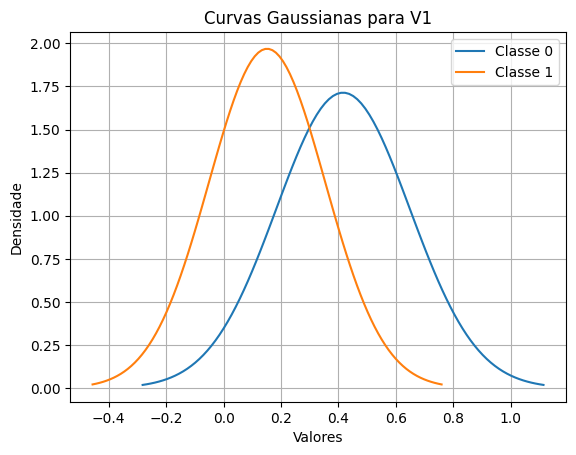

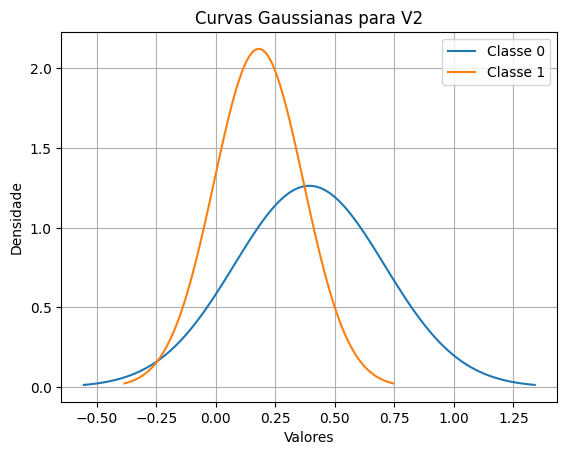

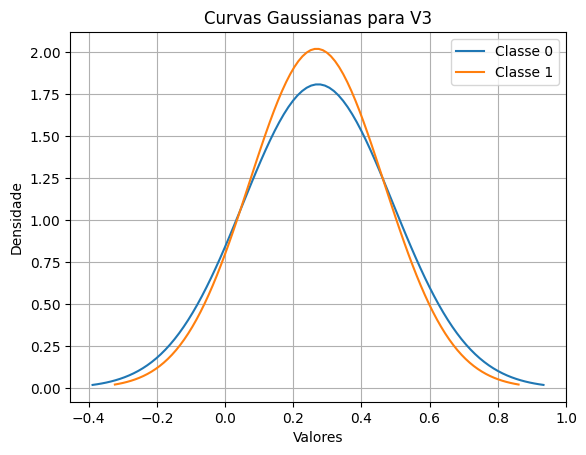

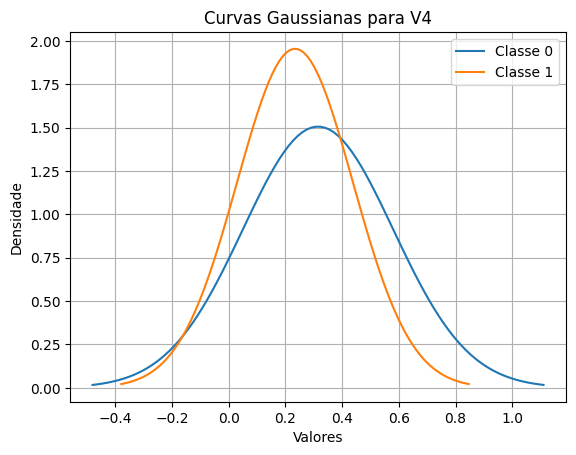

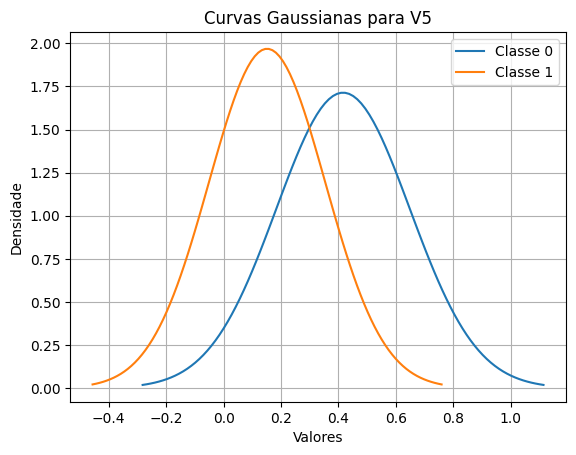

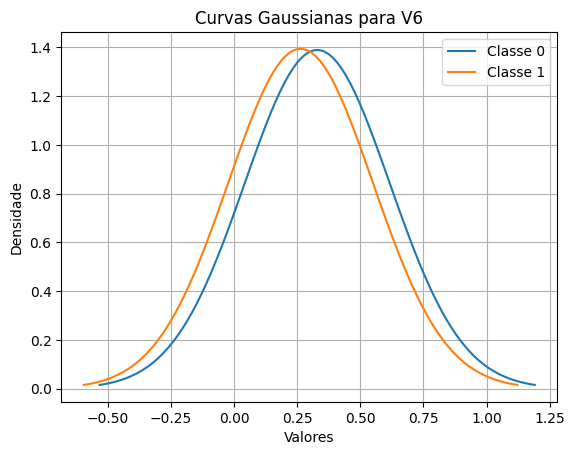

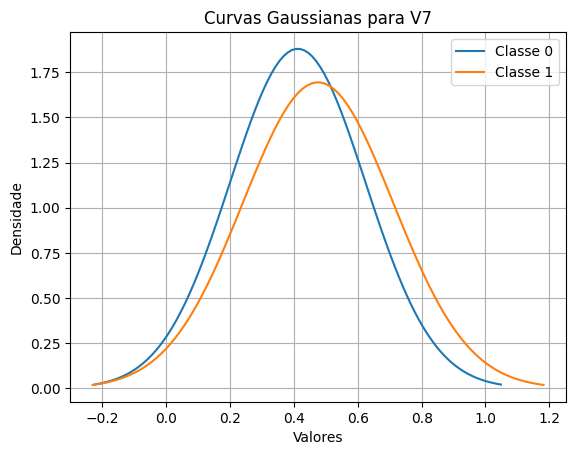

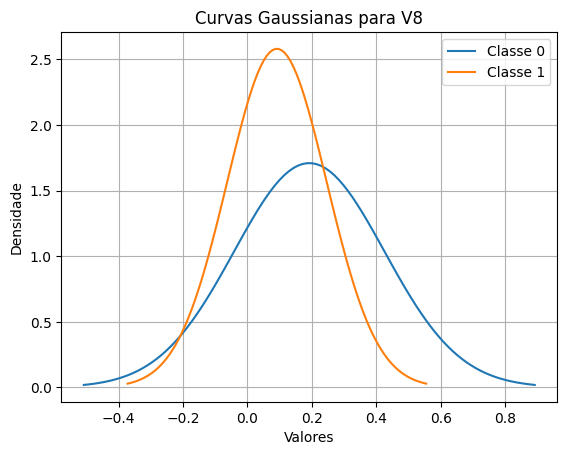

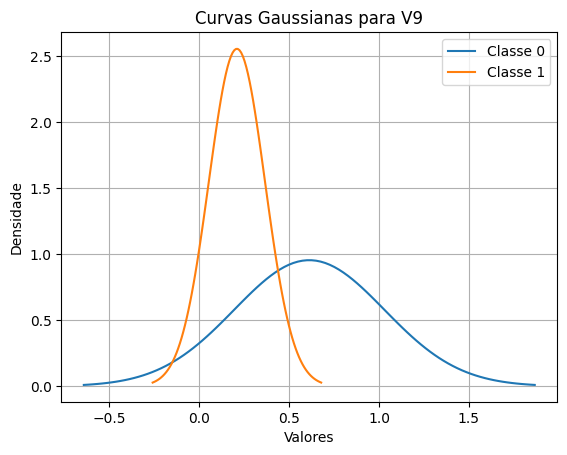

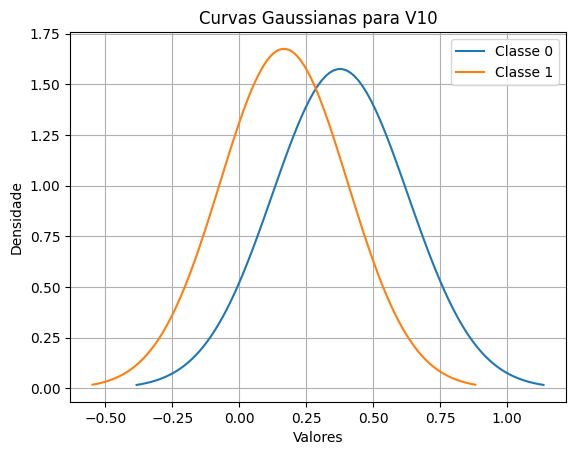

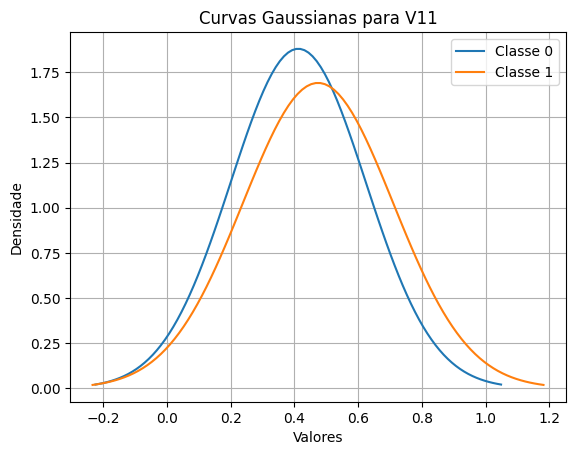

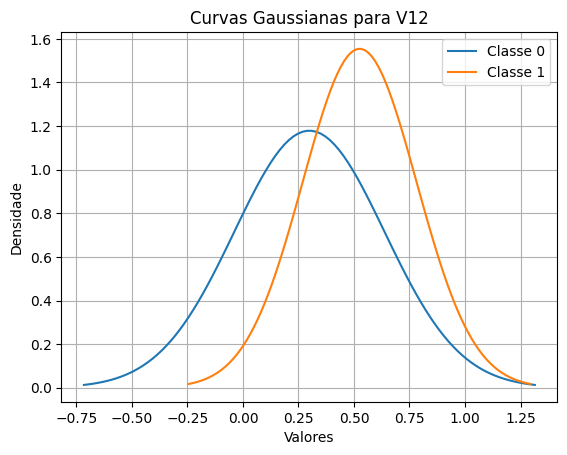

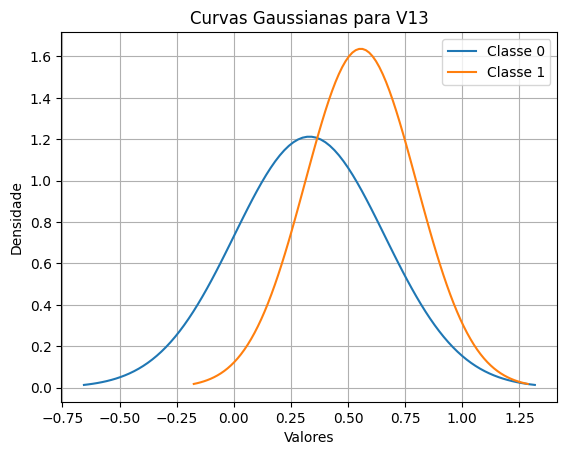

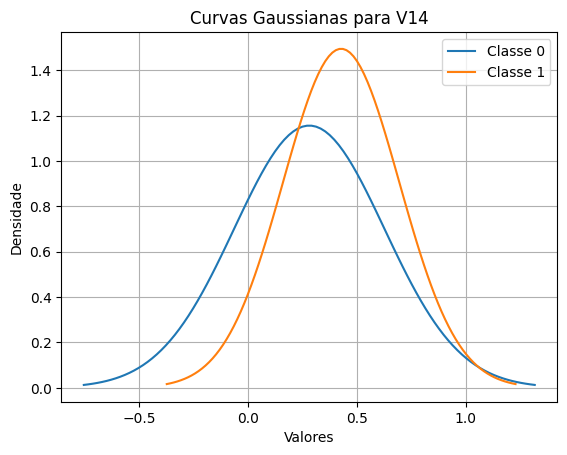

In [728]:
# Função para plotar a curva gaussiana
def plot_gaussiana(media, desvio_padrao, label):
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    y = (1 / (desvio_padrao * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - media)/desvio_padrao)**2)
    plt.plot(x, y, label=label)

# Separar os dados em classes 0 e 1
df_classe_0 = df_copia[df_copia['V15'] == 0]
df_classe_1 = df_copia[df_copia['V15'] == 1]

# Iterar pelas colunas de V1 a V14
for coluna in df_copia.columns[:-1]:
    # Calcular média e desvio padrão para a classe 0
    media_classe0 = df_classe_0[coluna].mean()
    desvio_padrao_classe0 = df_classe_0[coluna].std()
    
    # Calcular média e desvio padrão para a classe 1
    media_classe1 = df_classe_1[coluna].mean()
    desvio_padrao_classe1 = df_classe_1[coluna].std()
    
    # Plotar as curvas gaussianas para a coluna atual
    plt.figure()
    plot_gaussiana(media_classe0, desvio_padrao_classe0, 'Classe 0')
    plot_gaussiana(media_classe1, desvio_padrao_classe1, 'Classe 1')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.title(f'Curvas Gaussianas para {coluna}')
    plt.legend()
    plt.grid(True)
    plt.show()


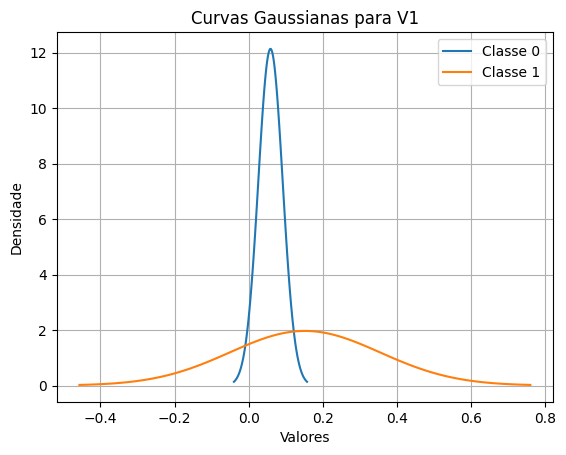

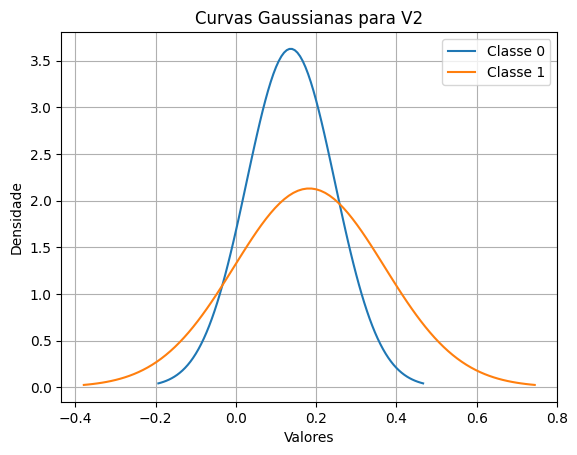

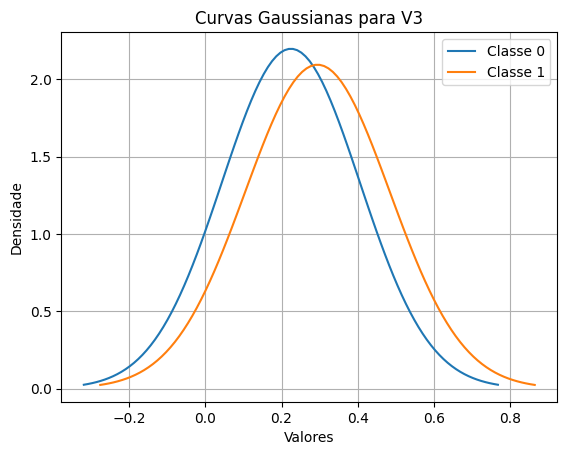

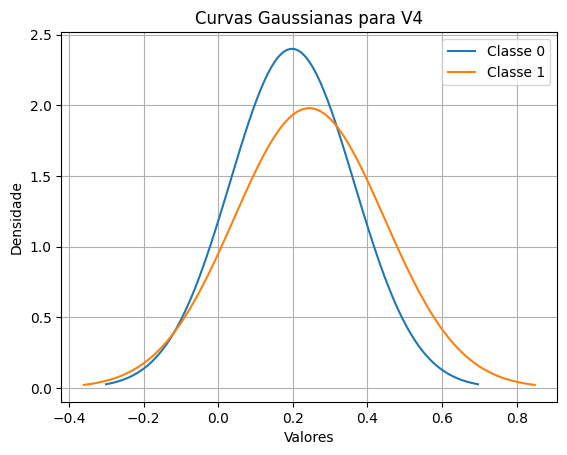

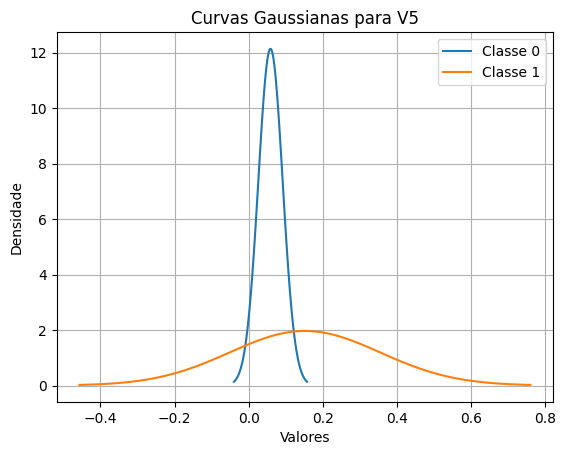

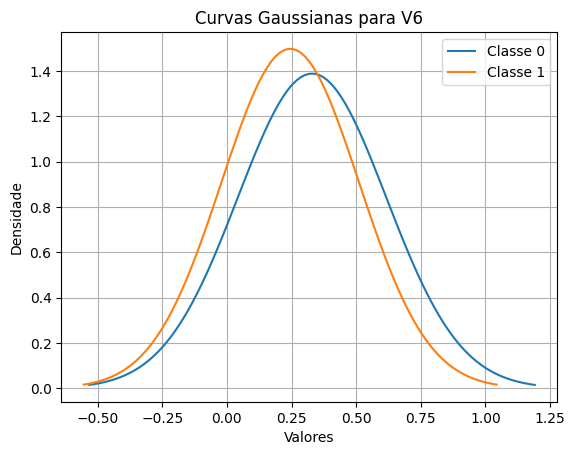

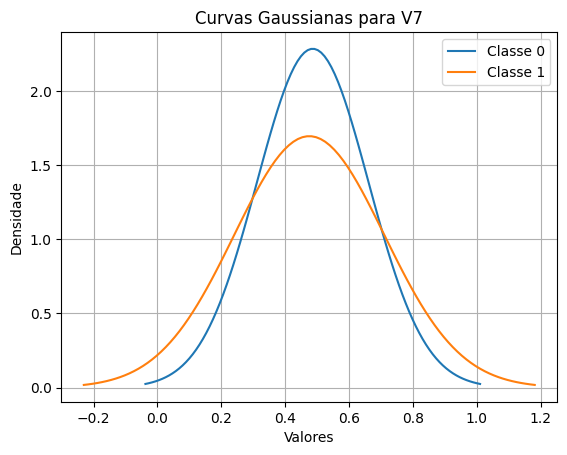

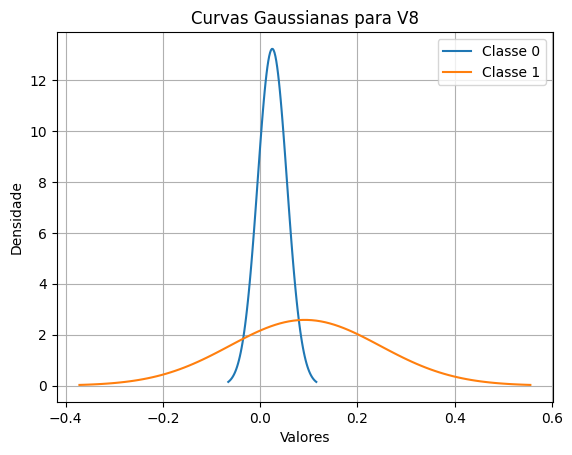

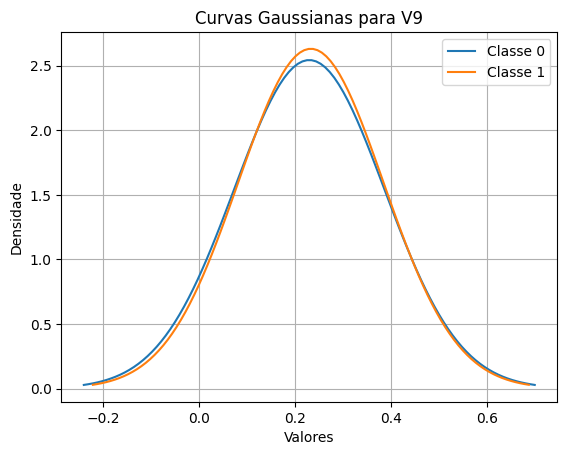

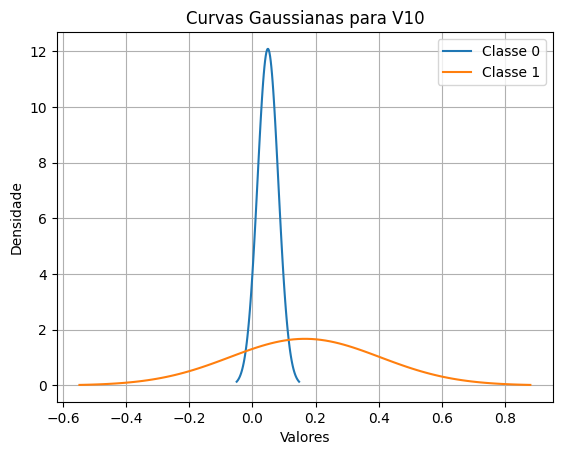

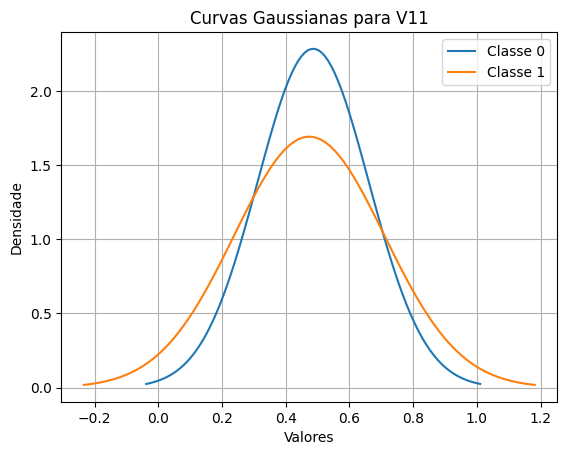

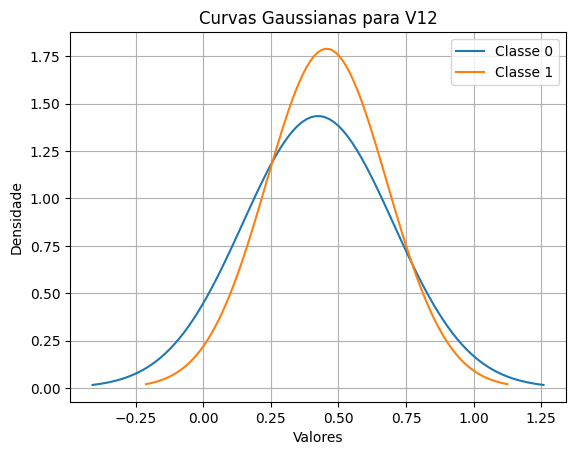

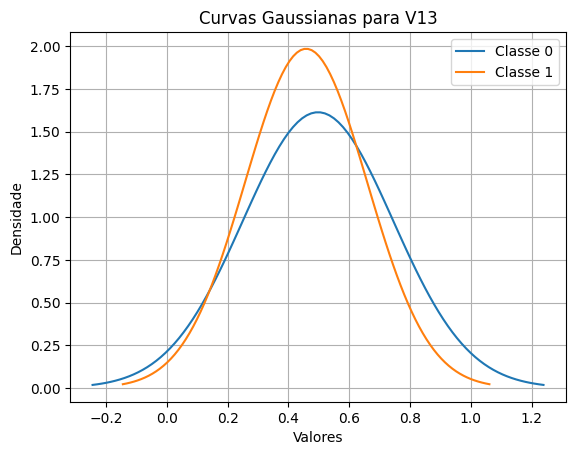

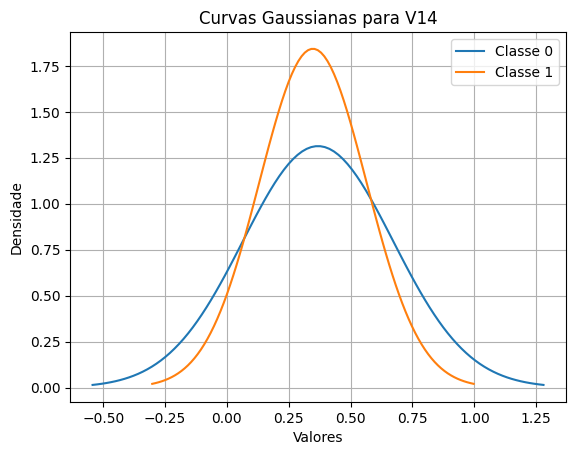

In [729]:
# Função para plotar a curva gaussiana
def plot_gaussiana(media, desvio_padrao, label):
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    y = (1 / (desvio_padrao * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - media)/desvio_padrao)**2)
    plt.plot(x, y, label=label)

# Separar os dados em classes 0 e 1
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Iterar pelas colunas de V1 a V14
for coluna in df_normalizado.columns[:-1]:
    # Calcular média e desvio padrão para a classe 0
    media_classe0 = df_classe_0[coluna].mean()
    desvio_padrao_classe0 = df_classe_0[coluna].std()
    
    # Calcular média e desvio padrão para a classe 1
    media_classe1 = df_classe_1[coluna].mean()
    desvio_padrao_classe1 = df_classe_1[coluna].std()
    
    # Plotar as curvas gaussianas para a coluna atual
    plt.figure()
    plot_gaussiana(media_classe0, desvio_padrao_classe0, 'Classe 0')
    plot_gaussiana(media_classe1, desvio_padrao_classe1, 'Classe 1')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.title(f'Curvas Gaussianas para {coluna}')
    plt.legend()
    plt.grid(True)
    plt.show()


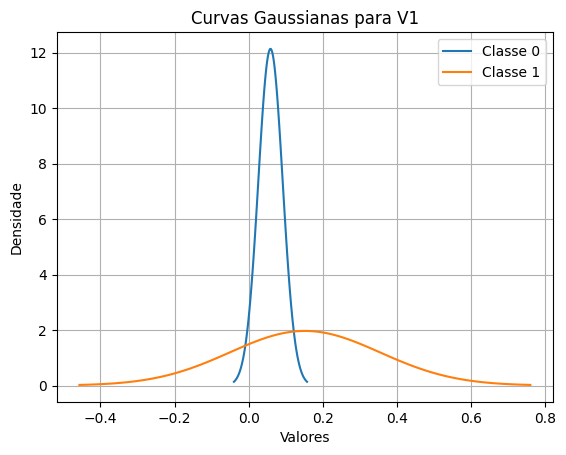

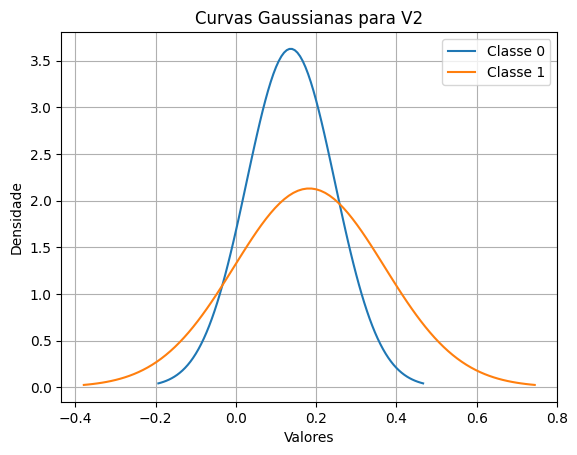

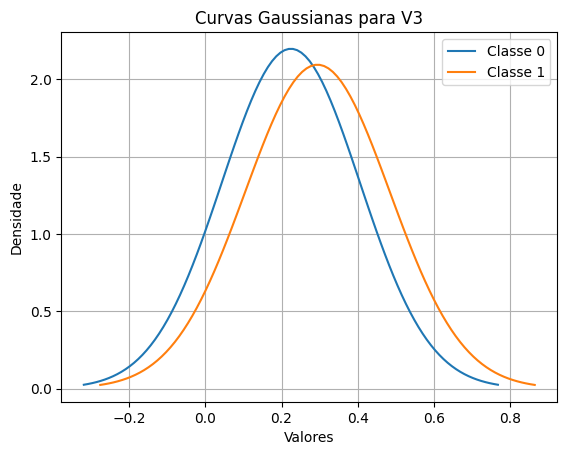

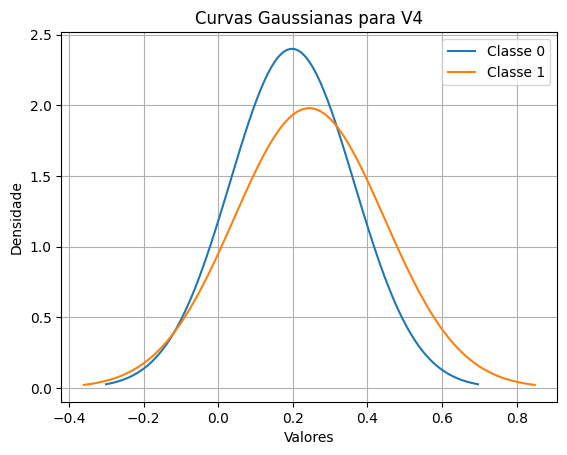

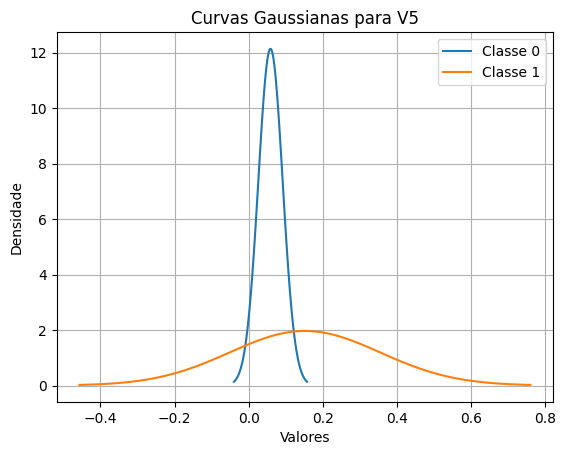

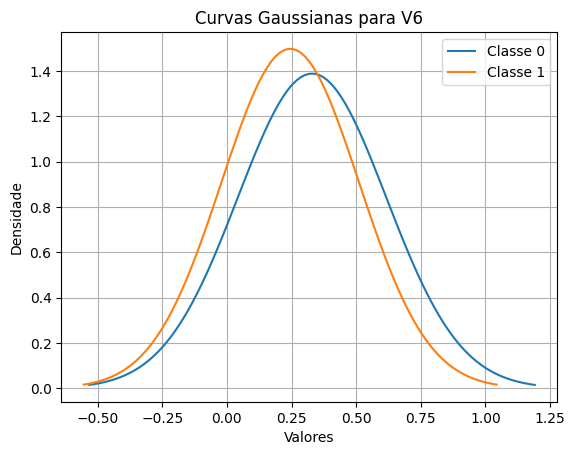

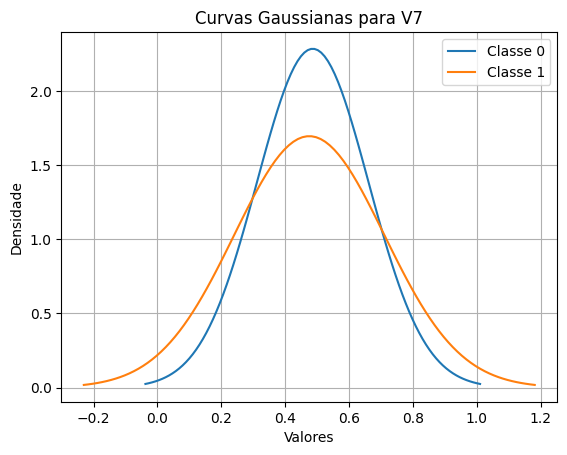

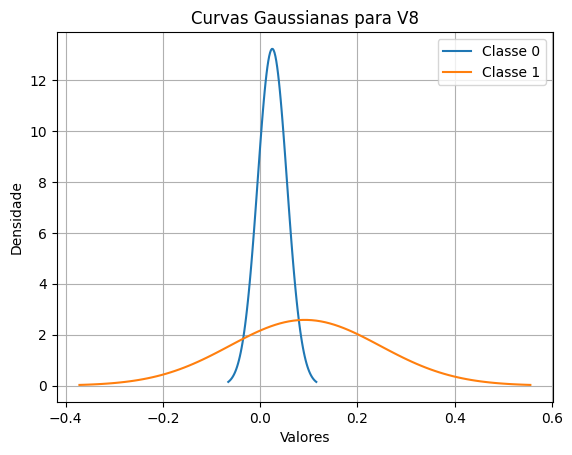

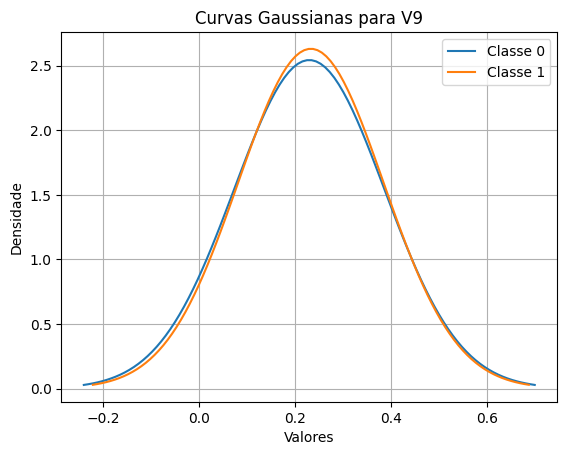

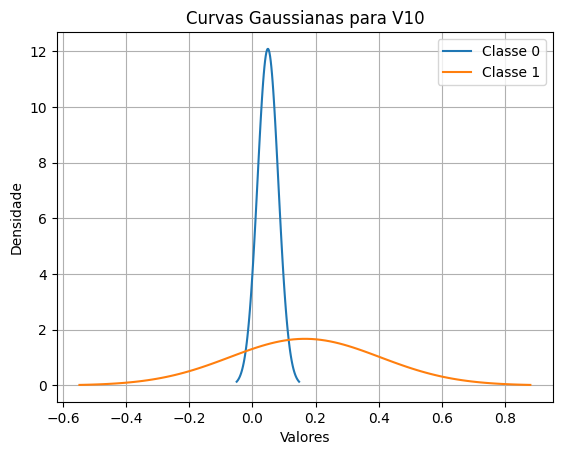

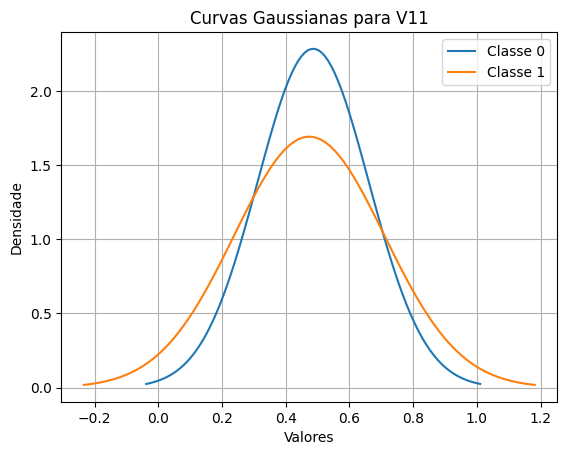

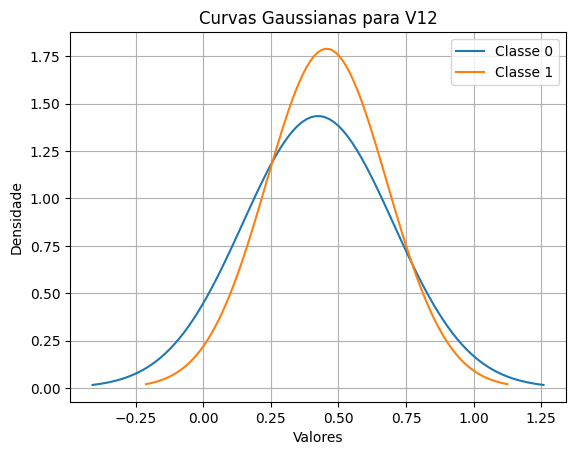

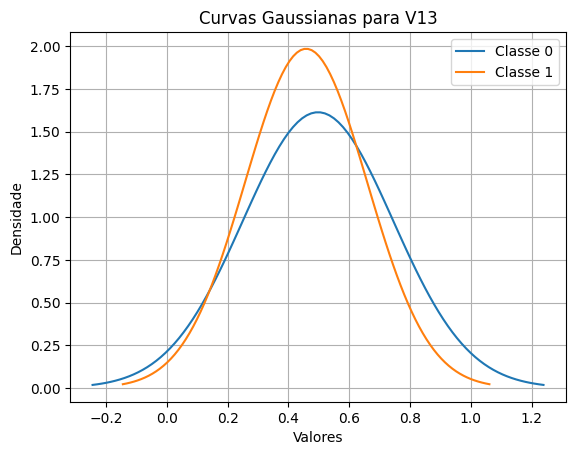

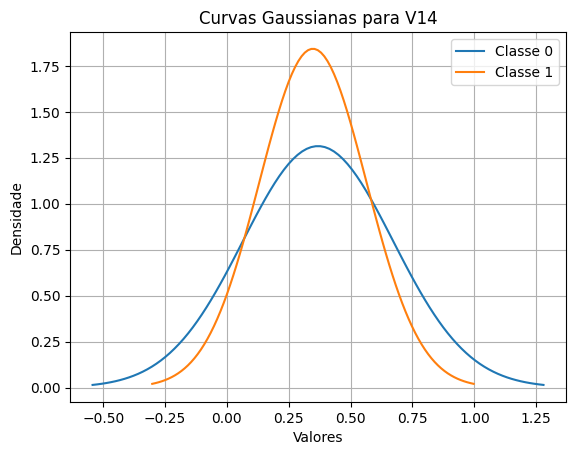

In [730]:
# Função para plotar a curva gaussiana
def plot_gaussiana(media, desvio_padrao, label):
    x = np.linspace(media - 3*desvio_padrao, media + 3*desvio_padrao, 100)
    #x_padronizado = (x - np.min(x)) / (np.max(x) - np.min(x))
    #MANDAR EMAIL PRA KUPAC


    y = (1 / (desvio_padrao * np.sqrt(2*np.pi))) * np.exp(-0.5*((x - media)/desvio_padrao)**2)
    plt.plot(x, y, label=label)

# Separar os dados em classes 0 e 1
df_classe_0 = df_normalizado[df_normalizado['V15'] == 0]
df_classe_1 = df_normalizado[df_normalizado['V15'] == 1]

# Iterar pelas colunas de V1 a V14
for coluna in df_normalizado.columns[:-1]:
    # Calcular média e desvio padrão para a classe 0
    media_classe0 = df_classe_0[coluna].mean()
    desvio_padrao_classe0 = df_classe_0[coluna].std()
    
    # Calcular média e desvio padrão para a classe 1
    media_classe1 = df_classe_1[coluna].mean()
    desvio_padrao_classe1 = df_classe_1[coluna].std()
    
    # Plotar as curvas gaussianas para a coluna atual
    plt.figure()
    plot_gaussiana(media_classe0, desvio_padrao_classe0, 'Classe 0')
    plot_gaussiana(media_classe1, desvio_padrao_classe1, 'Classe 1')
    plt.xlabel('Valores')
    plt.ylabel('Densidade')
    plt.title(f'Curvas Gaussianas para {coluna}')
    plt.legend()
    plt.grid(True)
    plt.show()